In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pandas import DataFrame

In [2]:
#locate and read adult census data
adult_path= "adult.csv"
adult = pd.read_csv(adult_path)

#display the data table for review
#adult

In [3]:
# Find all the data for the duplicate rows
dupes = adult[adult.duplicated()]
dupes.head(2)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K


In [4]:
dupes.head(2)
#show number of rows
dupes.shape

(24, 15)

In [5]:
# List the index for each duplicated rows
list_index = adult[adult.duplicated()].index.tolist()
#list_index

In [6]:
# Create a clean DataFrame by dropping the duplicate rows 
clean_df = adult.drop(list_index)
#clean_df

In [7]:
#check number of entries
adult["age"].count()

32561

In [8]:
#check number of adults
adult["age"].nunique()

73

In [9]:
#country counts, all entries
#n_c_group = adult.groupby("native.country")
n_c_group = len(adult["native.country"].value_counts())
n_c_ct = pd.DataFrame([n_c_group], columns = ["count"])
n_c_ct

,count
0,42


In [10]:
#pull out rows for united states only / count
nc = adult.loc[adult["native.country"] == "United-States",:]
#print(nc)
us = len(nc["fnlwgt"].value_counts())
us_count = pd.DataFrame([us], columns = ["US Count"])
us_count

,US Count
0,19835


In [11]:
#education
education = adult.groupby("education")
education_df = pd.DataFrame(education["education.num"].count())
education_df.head()

,education.num
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333


In [12]:
#find then remove all "?"
garbageout = adult.drop(adult[adult["occupation"] == "?"].index)
#garbageout

In [13]:
#update the dropped df with NA in place of ?
cleaned_df = clean_df.replace(to_replace ="?", value ="NA")
#cleaned_df

In [14]:
over_50k = garbageout[garbageout["income"] == ">50K"]

In [15]:
under_50k = garbageout[garbageout["income"] == "<=50K"]

In [16]:
education_over_50k = garbageout["education.num"][garbageout["income"] == ">50K"]
education_under_50k = garbageout["education.num"][garbageout["income"] == "<=50K"]
ed1 = education_over_50k
ed2 = education_under_50k
ed1
#ed1.plot.barh()
#ed2

7        16
9        10
10       16
11       15
12       13
         ..
32536    13
32539    13
32547    12
32555    14
32558     9
Name: education.num, Length: 7650, dtype: int64

In [17]:
#education
education = adult.groupby("education")
education_df = pd.DataFrame(education["education"].count())
education_df.head()

,education
education,
10th,933
11th,1175
12th,433
1st-4th,168
5th-6th,333


In [18]:
#hours worked by gender
fhrs = garbageout["hours.per.week"][garbageout["sex"] == "Female"]
fhrs.tail()
mhrs = garbageout["hours.per.week"][garbageout["sex"] == "Male"]
mhrs
tothrs = (fhrs, mhrs)
#tothrs

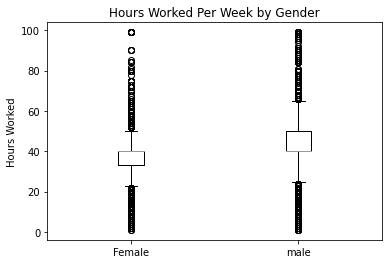

In [19]:
#box plot hours worked per week by gender
graph = [fhrs, mhrs]
labels = ["Female", "male"]
fig1, ax1 = plt.subplots()
ax1.set_title("Hours Worked Per Week by Gender")
ax1.set_ylabel("Hours Worked")
ax1.boxplot(graph, labels=labels)
plt.show()

In [20]:
#do those that earn >50K work more hours per week
hours1 = garbageout["hours.per.week"][garbageout["income"] == ">50K"]
#hours1
hours2 = garbageout["hours.per.week"][garbageout["income"] == "<=50K"]
hours2

1        18
3        40
4        40
5        45
6        40
         ..
32554    11
32556    40
32557    38
32559    40
32560    20
Name: hours.per.week, Length: 23068, dtype: int64

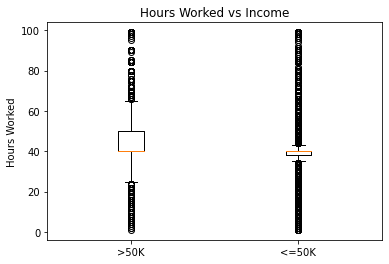

In [21]:
#box plot hours worked per week vs income
graph = [hours1, hours2]
labels = [">50K", "<=50K"]
fig1, ax1 = plt.subplots()
ax1.set_title("Hours Worked vs Income")
ax1.set_ylabel("Hours Worked")
ax1.boxplot(graph, labels=labels)
plt.show()

In [22]:
#age vs hours per week
#group age in bins of 10 years
age_bins = [0,17, 37, 58,79,89,91]
#group_names = ["<17", "17-32", "33-49", "50-65", "66-82", "83+"]
group_names = ["<17", "17-32", "33-49", "50-65", "66-81", "82,90"]
#dataframe for age and hours per week
agehrs = pd.cut(cleaned_df["age"], age_bins, labels = group_names)
#agehrs
agehrs = pd.DataFrame(agehrs)
agehrs = agehrs.rename(columns = {"age": "Age Demographic"})
agehrs 
xagehrs = agehrs.merge(cleaned_df,left_index = True, right_index = True)
#xagehrs

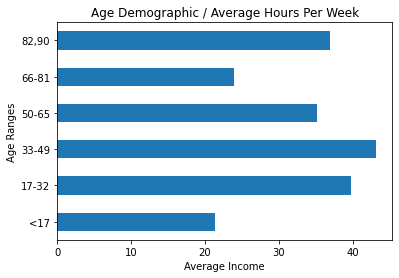

In [23]:
# barplot with age demo and hours worked
aveage = xagehrs.groupby("Age Demographic").mean()["hours.per.week"]
aveage
aveage.plot.barh()
plt.xlabel("Average Income")
plt.ylabel("Age Ranges")
plt.title("Age Demographic / Average Hours Per Week")
plt.show()

In [24]:
#private sector vs other work classes
work = xagehrs.groupby(['workclass', 'income']).count()["sex"]
bar_income= work.reset_index()
bar_income

#does private earn more

,workclass,income,sex
0,Federal-gov,<=50K,589
1,Federal-gov,>50K,371
2,Local-gov,<=50K,1476
3,Local-gov,>50K,617
4,NA,<=50K,1645
5,NA,>50K,191
6,Never-worked,<=50K,7
7,Private,<=50K,17712
8,Private,>50K,4961
9,Self-emp-inc,<=50K,494


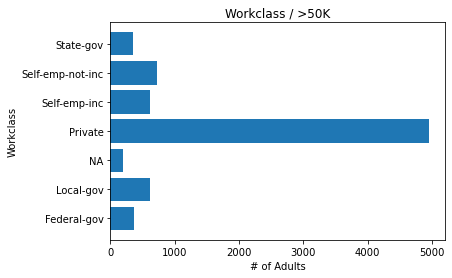

In [37]:
#bar chart >50K
high_income = bar_income[bar_income['income'] == '>50K']
plt.barh(high_income['workclass'], high_income['sex'])
plt.xlabel("# of Adults")
plt.ylabel("Workclass")
plt.title("Workclass / >50K")

plt.show()

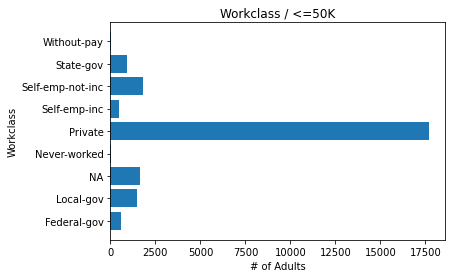

In [35]:
#bar chart <=50K
low_income = bar_income[bar_income['income'] == '<=50K']
plt.barh(low_income['workclass'], low_income['sex'])
plt.xlabel("# of Adults")
plt.ylabel("Workclass")
plt.title("Workclass / <=50K")
plt.show()

In [27]:
#show income for each workclass. wklow(<=50k @ 50K each) - wkhigh(>50k @ 51K each)
wkhigh = cleaned_df["workclass"][cleaned_df["income"] == ">50K"].value_counts()
wkhigh

Private             4961
Self-emp-not-inc     724
Self-emp-inc         622
Local-gov            617
Federal-gov          371
State-gov            353
NA                   191
Name: workclass, dtype: int64

In [28]:
wklow = cleaned_df["workclass"][cleaned_df["income"] == "<=50K"].value_counts()
wklow

Private             17712
Self-emp-not-inc     1816
NA                   1645
Local-gov            1476
State-gov             945
Federal-gov           589
Self-emp-inc          494
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

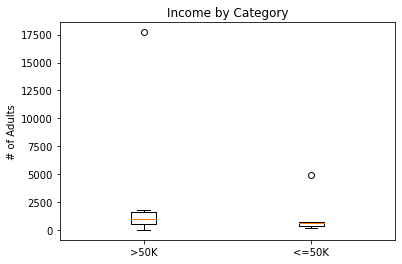

In [38]:
#box plot workclass: The 2 outliers are both "Private"
graph = [wklow, wkhigh]
labels = [">50K", "<=50K"]
fig1, ax1 = plt.subplots()
ax1.set_title("Income by Category")
ax1.set_ylabel("# of Adults")
ax1.boxplot(graph, labels=labels)
plt.show()

In [30]:
#Income >50K: total all private vs all other combined
privatehigh = 4961 * 51000
print(privatehigh)
otherhigh = 2687 * 51000
print(otherhigh)

253011000
137037000


In [31]:
#Income <=50K: total all private vs all other combined
privatelow = 17712 * 50000
print(privatelow)
otherlow = 5342 * 50000
print(otherlow)


885600000
267100000


In [32]:
print("")
print("    WORKCLASS INCOME SUMMARY")
print(" Private vs All OTHER BY pay scale")
print("-------------------------------------------")
print("   * <=50k @ 50K per adult")
print("-------------------------------------------")
print("PRIVATE")
print(privatelow)
print("All OTHER") 
print(otherlow)
print("-------------------------------------------")
print("")
print("   * >50k @ 51K per adult")
print("-------------------------------------------")
print("PRIVATE")
print(privatehigh)
print("ALL OTHER")
print(otherhigh)


    WORKCLASS INCOME SUMMARY
 Private vs All OTHER BY pay scale
-------------------------------------------
   * <=50k @ 50K per adult
-------------------------------------------
PRIVATE
885600000
All OTHER
267100000
-------------------------------------------

   * >50k @ 51K per adult
-------------------------------------------
PRIVATE
253011000
ALL OTHER
137037000


In [33]:
#join and create one income dataframe with low and high categories
incomejoin_df = pd.concat([wkhigh, wklow], axis = 1, sort = True, keys = [">50k", "<=50k"])
incomejoin_df

,>50k,<=50k
Federal-gov,371.0,589
Local-gov,617.0,1476
NA,191.0,1645
Never-worked,NaN,7
Private,4961.0,17712
Self-emp-inc,622.0,494
Self-emp-not-inc,724.0,1816
State-gov,353.0,945
Without-pay,NaN,14


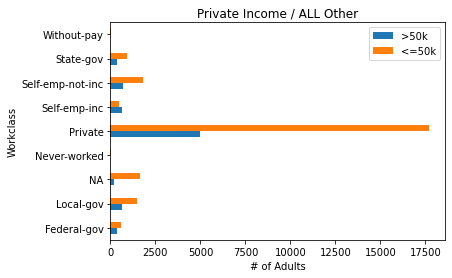

In [39]:
#bar plot incomejoin_df
incomejoin_df.plot.barh()
plt.xlabel("# of Adults")
plt.ylabel("Workclass")
plt.title("Private Income / ALL Other")
plt.show()